<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import seaborn as sns
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import plotly.graph_objects as go

#pio.renderers.default = "notebook"

In [2]:
df_apr = pd.read_csv("uber-trip-data/uber-raw-data-apr14.csv")
df_may = pd.read_csv('uber-trip-data/uber-raw-data-may14.csv') 
df_jun = pd.read_csv('uber-trip-data/uber-raw-data-jun14.csv')
df_jul = pd.read_csv('uber-trip-data/uber-raw-data-jul14.csv')
df_aug = pd.read_csv('uber-trip-data/uber-raw-data-aug14.csv')
df_sep = pd.read_csv('uber-trip-data/uber-raw-data-sep14.csv')

In [3]:
dataset = pd.concat([df_apr, df_may, df_jun, df_jul, df_aug, df_sep], ignore_index=True)


print("Display of dataset: ")
display(dataset.head())
print()

print("Number of rows and columns : {}".format(dataset.shape))#[0]))
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Display of dataset: 


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512



Number of rows and columns : (4534327, 4)

Percentage of missing values: 


Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64

In [4]:
# df_janjune = pd.read_csv('uber-trip-data/uber-raw-data-janjune-15.csv')
# # Basic stats
# print("Number of rows and columns : {}".format(df_janjune.shape))#[0]))
# print()

# print("Display of dataset: ")
# display(df_janjune.head())
# print()

df_zone = pd.read_csv('uber-trip-data/taxi-zone-lookup.csv')
print("Number of rows and columns : {}".format(df_zone.shape))#[0]))
print()

print("Display of dataset: ")
display(df_zone.head())
# print()


Number of rows and columns : (265, 3)

Display of dataset: 


,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


Text(0.5, 1.0, 'Number of Trips by Pickup points')

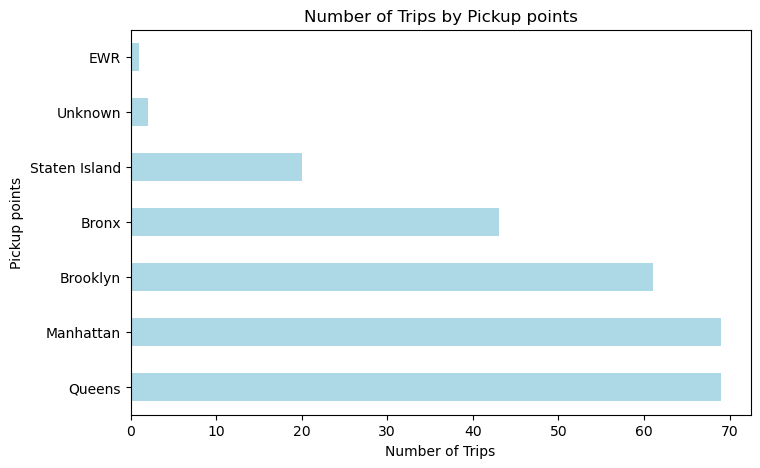

In [5]:
pic_point = df_zone[ 'Borough' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'lightblue', figsize=(8, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')


Text(0.5, 1.0, 'Number of Trips by Zones')

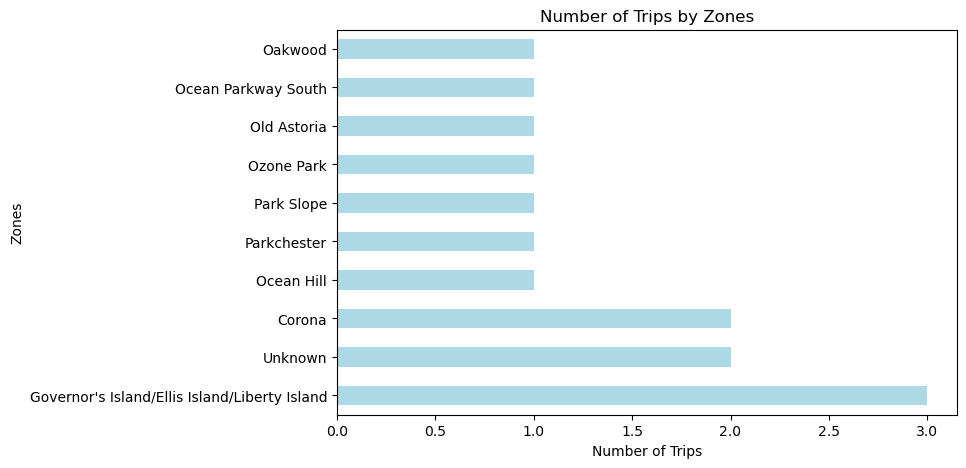

In [6]:
zone_point = df_zone[ 'Zone' ].value_counts().nlargest(10)
zone_point.plot(kind='barh', color= 'lightblue', figsize=(8, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Zones' )
plt.title( 'Number of Trips by Zones')

In [7]:
dataset['Date/Time'] = pd.to_datetime(dataset["Date/Time"])

dataset['Year']      = dataset['Date/Time'].dt.year
dataset['Month']     = dataset['Date/Time'].dt.month
dataset['WeekDay']   = dataset['Date/Time'].dt.day_name()
dataset['HourOfDay'] = dataset['Date/Time'].dt.hour

to_drop     = ["Date/Time"]
dataset = dataset.drop(to_drop, axis=1)


<Axes: xlabel='Base', ylabel='Number of Trips'>

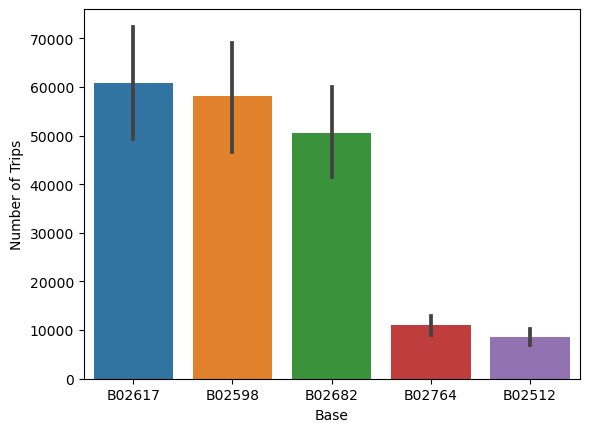

In [8]:
# Calculate the number of pickups per base
trips_by_loc = dataset[['Base', 'HourOfDay']].value_counts().reset_index()
trips_by_loc.columns = ['Base', 'HourOfDay', 'Number of Trips']
trips_by_loc

# Number of Trips by Base

sns.barplot(x="Base", y="Number of Trips", data=trips_by_loc)

In [ ]:
# Trips by location (base)
# fig = px.bar(trips_by_loc,
#              x='HourOfDay',
#              y='Number of Trips',
#              color='Base',
#              template='seaborn',
#              color_discrete_sequence=['#50F9F1','#6AE5A8','#96C96A','#B7AA47','#C78845'])
# fig.update_layout(title_text='Trips by location and time of the day', title_x=0.5)
# fig.show()

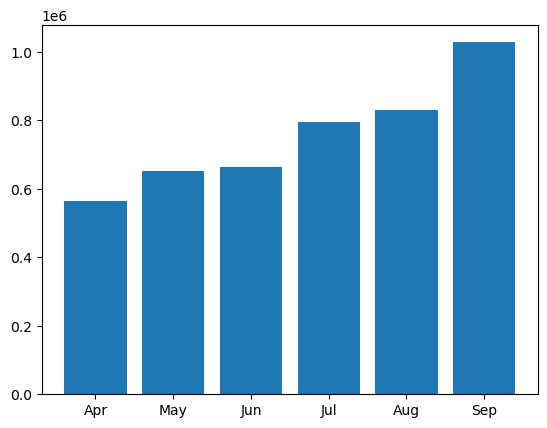

Values in percentenge
Month
9    22.674501
8    18.288822
7    17.557644
6    14.640409
5    14.388795
4    12.449830
Name: proportion, dtype: float64


In [9]:
Month=[4,5,6,7,8,9]
months=["Apr","May","Jun","Jul","Aug","Sep"]

stat_per_month=[len(dataset.loc[(dataset['Month']==i)]) for i in Month]
plt.bar(months,stat_per_month)
plt.show()

print("Values in percentenge")
print(dataset['Month'].value_counts(normalize=True) * 100)

Users travel the most during September

Values in percentenge
WeekDay
Thursday     16.653960
Friday       16.345072
Wednesday    15.360339
Tuesday      14.639196
Saturday     14.249391
Monday       11.941618
Sunday       10.810425
Name: proportion, dtype: float64


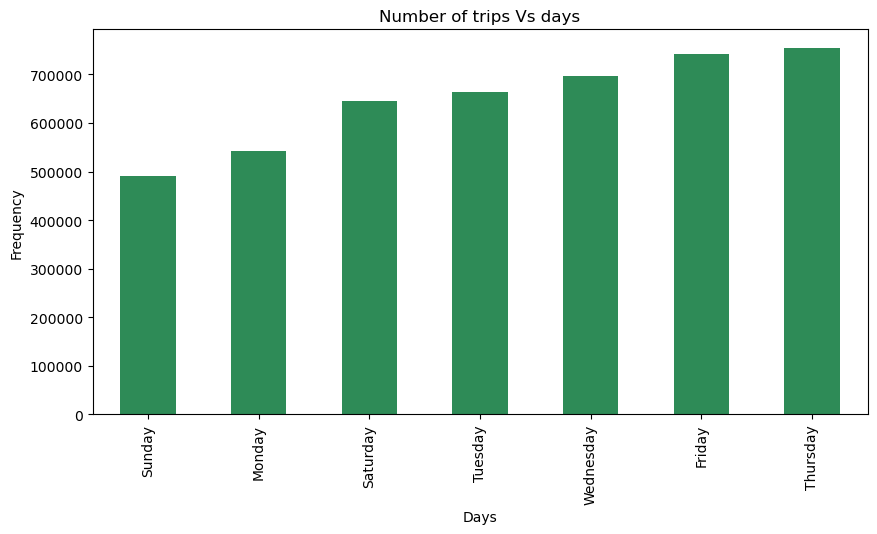

In [10]:
days = dataset["WeekDay"].value_counts().sort_values()
days.plot(kind = "bar", color = "seagreen", figsize=(10,5))
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Number of trips Vs days")

print("Values in percentenge")
print(dataset['WeekDay'].value_counts(normalize=True) * 100)

The user travels almost regularly each day of the week, he travels more on Thursdays, Wednesdays and Fridays.

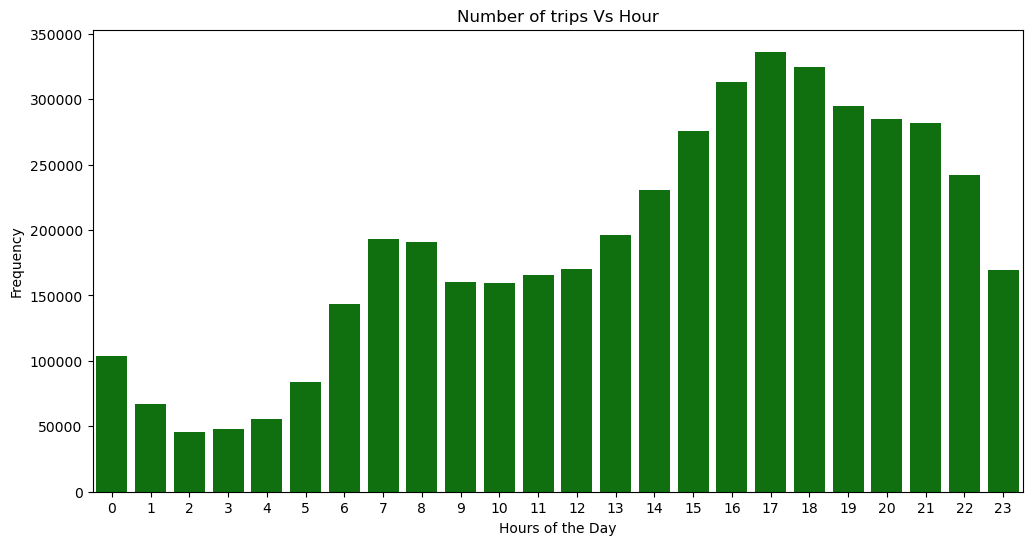

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=dataset, color='green')
plt.xlabel("Hours of the Day")
plt.ylabel("Frequency")
plt.title("Number of trips Vs Hour")
plt.show()

#print("Values in percentenge")
#print(dataset['HourOfDay'].value_counts(normalize=True) * 100)

The user travels early morning (6 to 8), during lunch hours and in the early evenings more than the rest of the day.

It peaks during evening time when people are logging off from work

In [ ]:
#Analysis of Rush of each hour in each month
# plt.figure(figsize=(40,20))
# for i,month in enumerate(dataset['Month'].unique()):
#     plt.subplot(3,2,i+1)
#     dataset[dataset['Month']==month]['HourOfDay'].hist()

Text(0.5, 1.0, 'hours of day vs latitude of passenger')

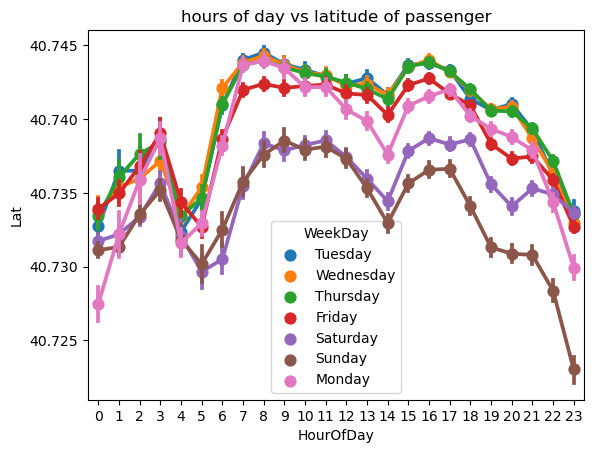

In [12]:
ax=sns.pointplot(x="HourOfDay",y="Lat", hue="WeekDay",data=dataset)
ax.set_title('hours of day vs latitude of passenger')

In [ ]:
# summary=dataset.groupby(['WeekDay', 'HourOfDay'])['Date'].count().reset_index()
# summary=summary.rename(columns = {'Date':'Counts'})
# summary
# plt.figure(figsize=(10,6))
# sns.pointplot(x="HourOfDay", y="Counts", hue="WeekDay", data=dataset)

# EDA for September

Text(0.5, 1.0, 'Number of trips Vs days of September')

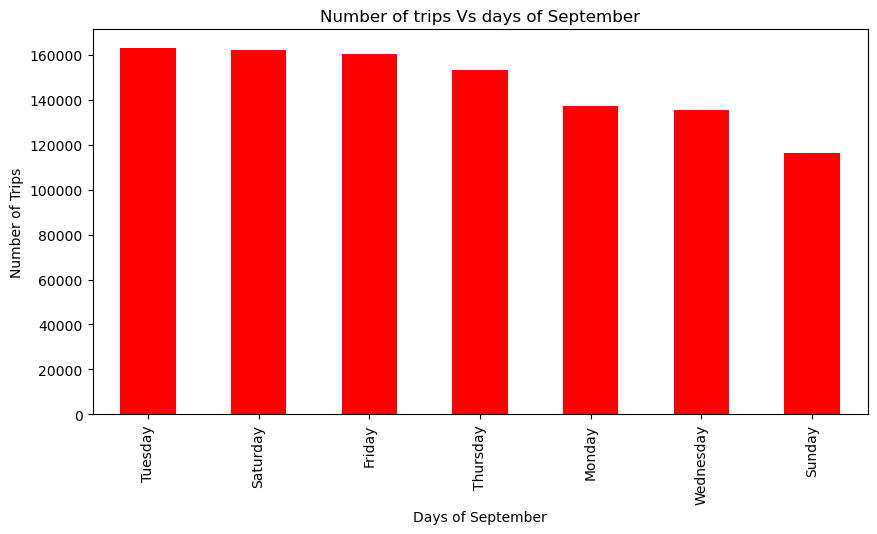

In [16]:
Sept = dataset[ 'WeekDay' ][dataset['Month']==9].value_counts()
Sept.plot(kind='bar', color= 'red', figsize=(10, 5) )
plt.xlabel('Days of September')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of September')

In September, The user travels almost regularly each day of the week, he travels more on Tuesdays, Thursdays, Saturdays and Fridays.

Text(0.5, 1.0, 'Number of trips Vs Hours of Days of September')

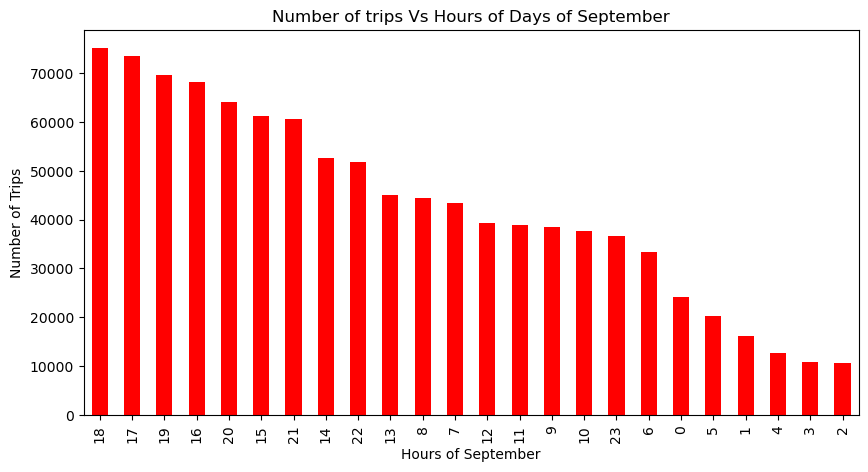

In [17]:
Sept = dataset[ 'HourOfDay'][dataset['Month']==9].value_counts()
Sept.plot(kind='bar', color= 'red', figsize=(10, 5) )
plt.xlabel('Hours of September')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs Hours of Days of September')

In [18]:
#dataset["Rush_Month_Sept"] = dataset["Month" == 9]
dataset['Day_period']  = dataset['WeekDay'].apply(lambda x: 'Hot days' if (x == "Thursday" or x == "Friday" or x == "Saturday" or x == "Tuesday") else ('Normal days' if (x == "Monday" or x == "Wednesday") else 'Rest days'))
dataset['Time_period'] = dataset['HourOfDay'].apply(lambda x: 'Morning' if 6 <= x <= 8 else ('Afternoon' if 14 <= x <= 22 else ('Midday' if 9 <= x <= 13 else 'Night')))
dataset.head()

,Lat,Lon,Base,Year,Month,WeekDay,HourOfDay,Day_period,Time_period
0,40.7690,-73.9549,B02512,2014,4,Tuesday,0,Hot days,Night
1,40.7267,-74.0345,B02512,2014,4,Tuesday,0,Hot days,Night
2,40.7316,-73.9873,B02512,2014,4,Tuesday,0,Hot days,Night
3,40.7588,-73.9776,B02512,2014,4,Tuesday,0,Hot days,Night
4,40.7594,-73.9722,B02512,2014,4,Tuesday,0,Hot days,Night


In [19]:
#data_sample = dataset.groupby("Month").sample(n=100000, random_state=0)
data_sample = dataset.sample(n=100000, random_state=0)
display(data_sample.head())
print()
print("Numbers of unique Values")
display(data_sample.nunique())


,Lat,Lon,Base,Year,Month,WeekDay,HourOfDay,Day_period,Time_period
1596051,40.7809,-73.9790,B02617,2014,6,Thursday,9,Hot days,Midday
895170,40.7673,-73.9564,B02617,2014,5,Friday,20,Hot days,Afternoon
1483071,40.6721,-73.9646,B02598,2014,6,Sunday,14,Rest days,Afternoon
2793242,40.7751,-73.9567,B02598,2014,8,Tuesday,8,Hot days,Morning
3615099,40.6271,-73.9437,B02598,2014,9,Wednesday,11,Normal days,Midday



Numbers of unique Values


Lat            3149
Lon            3479
Base              5
Year              1
Month             6
WeekDay           7
HourOfDay        24
Day_period        3
Time_period       4
dtype: int64

In [18]:
fig = px.scatter_mapbox(
        data_sample.loc[(data_sample["Day_period"] == "Hot days") & (data_sample["Time_period"] == "Morning") & (data_sample["Month"] == 9), :],
        lat="Lat",
        lon="Lon",
        color="Day_period",
        title="September Pickup points during hot days Morning",
        mapbox_style="carto-positron")
fig.show()

In [19]:
fig = px.scatter_mapbox(
        data_sample.loc[(data_sample["Day_period"] == "Hot days") & (data_sample["Time_period"] == "Midday") & (data_sample["Month"] == 9), :],
        lat="Lat",
        lon="Lon",
        color="Day_period",
        title="September Pickup points during hot days Mid Day",
        mapbox_style="carto-positron")
fig.show()

In [20]:
fig = px.scatter_mapbox(
        data_sample.loc[(data_sample["Day_period"] == "Hot days") & (data_sample["Time_period"] == "Afternoon") & (data_sample["Month"] == 9), :],
        lat="Lat",
        lon="Lon",
        color="Day_period",
        title="September Pickup points during hot days Afternoon",
        mapbox_style="carto-positron")
fig.show()

In [21]:
fig = px.scatter_mapbox(
        data_sample.loc[(data_sample["Day_period"] == "Hot days") & (data_sample["Time_period"] == "Night") & (data_sample["Month"] == 9), :],
        lat="Lat",
        lon="Lon",
        color="Day_period",
        title=" September Pickup points during hot days Night",
        mapbox_style="carto-positron")
fig.show()

# Preparation of data for September during hot days and hot afternoon hours

In [20]:
data_Hot_aft = data_sample[(data_sample["Day_period"] == "Hot days") & (data_sample["Time_period"] == "Afternoon") & (data_sample["Month"] == 9)]
data_Hot_aft = data_Hot_aft.loc[:, ["Lat", "Lon"]]

In [21]:
numeric_features = ["Lat", "Lon"]
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),])


In [22]:
# Preprocessings sur le dataset
print("Preprocessing sur le train set...")
X_Hot_aft = preprocessor.fit_transform(data_Hot_aft) 
print('...Terminé.')
print(X_Hot_aft[0:5, :])

Preprocessing sur le train set...
...Terminé.
[[-0.83090038  0.56759925]
 [ 0.84610522 -0.15212958]
 [ 0.15027305 -0.1434372 ]
 [-1.67941515 -0.16256043]
 [ 0.49818913  0.03214882]]


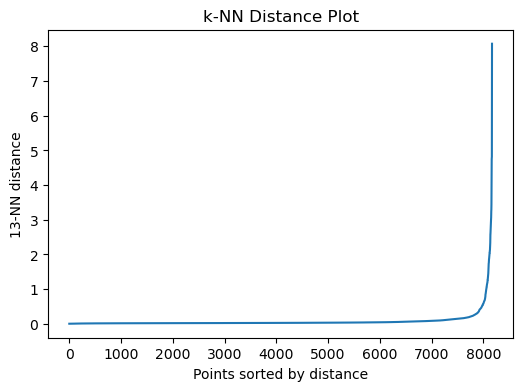

In [25]:
min_samples = 13  # Example value based on domain knowledge
from sklearn.neighbors import NearestNeighbors
# Compute k-nearest neighbors
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(X_Hot_aft)
distances, indices = nbrs.kneighbors(X_Hot_aft)

# Sort distances to the k-th nearest neighbor in ascending order
distances = np.sort(distances[:, min_samples - 1])

# Plot the distances
plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-NN distance')
plt.title('k-NN Distance Plot')
plt.show()

In [26]:
db = DBSCAN(eps=0.45, min_samples=13, metric="euclidean")
#db = DBSCAN(eps=0.2, min_samples=45, metric="euclidean")
#db = DBSCAN(eps=0.45, min_samples=10, metric="euclidean")
db.fit(X_Hot_aft)
np.unique(db.labels_)

array([-1,  0,  1,  2,  3])

In [27]:
data_Hot_aft["cluster"] = db.labels_
fig = px.scatter_mapbox(
        data_Hot_aft[data_Hot_aft.cluster != -1],
        lat="Lat",
        lon="Lon",
        color="cluster",
        title="Clusters for Hot Days Pickup points Afternoon",
        mapbox_style="carto-positron")
fig.show()

In [28]:
data_Hot_aft["cluster"] = db.labels_
data_Hot_aft.head()

,Lat,Lon,cluster
4407589,40.7068,-73.9412,0
4512217,40.7738,-73.9826,0
4432945,40.7460,-73.9821,0
3760294,40.6729,-73.9832,0
4025023,40.7599,-73.9720,0


In [29]:
dbsc_predict = db.fit_predict(data_Hot_aft)
dbsc_predict


array([0, 0, 0, ..., 0, 0, 1])

In [31]:
fig = px.scatter(data_Hot_aft, x = "Lon", y = "Lat", color = dbsc_predict)
fig.show()

# KMeans algorithm: Two ways of determining K the number of clusters

In [25]:
# The Elbow method minimizes the WCSS

wcss =  [] # the Within Cluster Sum of Squares
k = []
for i in range (2,13):
    kmeans = KMeans(n_clusters= i, random_state = 0, n_init = 'auto')
    kmeans.fit(X_Hot_aft)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

print(wcss)
   

WCSS for K=2 --> 11904.362166432862
WCSS for K=3 --> 8499.423746846025
WCSS for K=4 --> 6815.866742505827
WCSS for K=5 --> 5759.94312375341
WCSS for K=6 --> 4809.18678002177
WCSS for K=7 --> 3822.6542374073456
WCSS for K=8 --> 3557.199095971449
WCSS for K=9 --> 2570.533121636985
WCSS for K=10 --> 2275.8259507981484
WCSS for K=11 --> 2121.270937007466
WCSS for K=12 --> 1999.4036886119122
[11904.362166432862, 8499.423746846025, 6815.866742505827, 5759.94312375341, 4809.18678002177, 3822.6542374073456, 3557.199095971449, 2570.533121636985, 2275.8259507981484, 2121.270937007466, 1999.4036886119122]


In [26]:
fig = px.line(x = range(2,13), y = wcss)
fig.show()

4 or 5 is the optimum number of initial cluster because from 4 or 5 onwards, the wcss does not decrease a lot anymore

In [27]:
# Silhouette is to see how the clusters are far away from each other

# Import silhouette score
from sklearn.metrics import silhouette_score
s_score = []
for i in range (2,13): 
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X_Hot_aft)
    s_score.append(silhouette_score(X_Hot_aft, kmeans.predict(X_Hot_aft)))

print(s_score)

[0.7211405457023813, 0.37949893451610667, 0.40906463036659896, 0.4159458367193053, 0.423513256017705, 0.4335944108313299, 0.4510457791587152, 0.46904258528239917, 0.48039284365955215, 0.3717855642541009, 0.3736254322410248]


In [28]:
# Affichage de scores en fonction du nombre de clusters
fig = px.bar(x = range(2,13), y = s_score, title="Silhouette score per cluster")# yaxis_title="Silhouette Score", xaxis_title="# Clusters", )
fig.show()

According to sihlhouette method, K should be 2

In [47]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=4, random_state=0)
kmeans = KMeans(init='k-means++', n_clusters=4, random_state=0)
# Fit kmeans to our dataset
kmeans.fit(X_Hot_aft)

KMeans(n_clusters=4, random_state=0)

In [48]:
data_Hot_aft.loc[:,'Cluster_KMeans'] = kmeans.predict(X_Hot_aft)
data_Hot_aft.head()

,Lat,Lon,Cluster_KMeans
4407589,40.7068,-73.9412,3
4512217,40.7738,-73.9826,1
4432945,40.7460,-73.9821,1
3760294,40.6729,-73.9832,3
4025023,40.7599,-73.9720,1


In [49]:
fig = px.scatter(data_Hot_aft, x = 'Lon', y = "Lat", color = "Cluster_KMeans")
fig.show()

In [50]:
kmeans.cluster_centers_

array([[-1.42693812,  3.56155522],
       [ 0.55414392,  0.03987353],
       [ 4.62992821,  2.13238342],
       [-0.61162969, -0.35956415]])

In [ ]:
# Cluster centers coordinates
# Let's use inverse transform to have the real coordinates
#cluster_centers = kmeans.cluster_centers_

# Let's get column names to facilitate understanding
#labels = data_Hot_aft.feature_names

#matrix = pd.DataFrame(cluster_centers, columns = labels).round(2)

# Create heatmap with plotly
#import plotly.figure_factory as ff

#fig = ff.create_annotated_heatmap(matrix.values,
#                                  x = matrix.columns.tolist(),
#                                  y = matrix.index.tolist())
#fig.show()